# Solução pilar engastado e apoiado sob empuxo de terra

In [27]:
import sympy as sp

In [28]:
sp.init_printing()

In [29]:
from sympy import I, pi, oo


## 1. Definição das variáveis como simbólicas

In [30]:
E_c,I_c,p,a,b,L,M_A,A_y,B_y,x,C_1,C_2,C_3,C_4,E,M,V,theta,y = sp.symbols('E_c,I_c,p,a,b,L,M_A,A_y,B_y,x,C_1,C_2,C_3,C_4,E,M,V,theta,y',positive=True)

## 2. Função carga $q(x)$

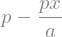

In [31]:
q_x = p - p/a*x 
q_x


## 3. Reações de apoio

In [32]:
A_y = sp.Rational(1,2)*p*a
A_y

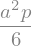

In [33]:
M_A = sp.Rational(1,6)*p*a**2
M_A

## 4. Esforços solicitantes

### Esforço cortante $V(x)$ para $x<=a$.

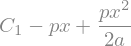

In [34]:
V = -sp.integrate(q_x, x) + C_1
V

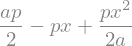

In [35]:
V = V.subs({C_1:sp.Rational(1,2)*p*a})
V

### Momento fletor $M(x)$ para $x<=a$.

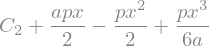

In [36]:
M = sp.integrate(V, x) + C_2
M

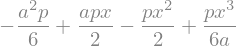

In [37]:
M = M.subs({C_2:-sp.Rational(1,6)*p*a**2})
M


## 3. Equação diferencial da linha elástica

$$ \frac{d^2y}{dx^2} = \frac{M(x)}{E_c I_c}$$

### Rotações $\theta$.

$$\theta = \frac{dy}{dx} = \frac{1}{E_c I_c} \int{M(x)dx} + C_3$$

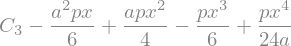

In [38]:
theta = sp.integrate(M, x) + C_3
theta

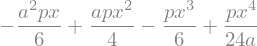

In [39]:
theta = theta.subs({C_3:0})
theta

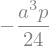

In [40]:
theta_a = theta.subs({x: a})
theta_a

### Flecha y

$$ y = \int{\theta(x)dx} + C_4 $$

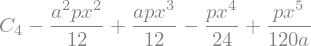

In [41]:
y = sp.integrate(theta, x) + C_4
y

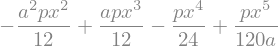

In [42]:
y = y.subs({C_4:0})
y

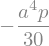

In [43]:
y_a = y.subs({x:a})
y_a

### Flecha na ponta do balanço

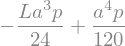

In [44]:
y_L = y_a + theta_a * (L - a)
y_L = sp.expand(y_L)
y_L

## 4. Solução do problema hiperestático

### Método das forças

$$y_R = y_B(p) + y_B(B_y) = 0$$

$$y_B(B_y) = \frac{1}{3} \frac{B_y L^3}{E_c I_c}$$

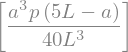

In [45]:
y_By = sp.Rational(1,3) * B_y * L ** 3

y_R = y_L + y_By

B_R = sp.solve(y_R, B_y)

B_R

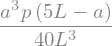

In [46]:
B_y = a**3*p*(5*L-a)/(40*L**3)

B_y

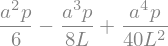

In [47]:
M_R = sp.Rational(1,6)*p*a**2 - B_y*L

M_R = M_R.expand(M_R)

M_R


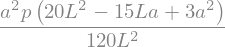

In [48]:
factor = sp.Rational(1,120)*p*a**2/L**2

M_R = sp.factor(M_R/factor)*factor

M_R

### Resultados em termos da força de empuxo

$$E = \frac{1}{2} p a$$

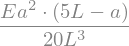

In [49]:
factor = sp.Rational(1,2)*p*a

B_y = B_y/factor*E

B_y

#### Reação $B_y$

$$ B_y = \frac{E a^2 (5L -a)}{20L^3} $$

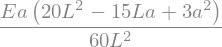

In [50]:
factor = sp.Rational(1,6)*p*a**2

M_R = M_R/factor*(sp.Rational(1,3)*E*a)

M_R

#### Momento no engaste $M_A$

$$ M_A = \frac{Ea}{3} \frac{(20L^2-15La + 3a^2)}{20L^2}$$

#### Ou ainda:

$$ M_A = \frac{Ea}{3} \left( 1.00 - 0.75 \frac{a}{L} + 0.15 \frac{a^2}{L^2} \right)$$